In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
insurance[['sex']]

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [38]:
# dummy화(범주화) 시킬때 기존 변수가 연속형, 범주형 구분하지 않고 바꿔주면 됨 함수 자체에서 구분하여 처리
insurance.sex=pd.get_dummies(insurance['sex'], drop_first=True )
insurance.smoker = pd.get_dummies(insurance['smoker'], drop_first=True )
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [97]:
columns=[insurance.columns.append(region.columns)]
columns

[Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
        'northwest', 'southeast', 'southwest'],
       dtype='object')]

In [99]:
region=pd.get_dummies(insurance.region,drop_first=True)
pan=insurance.values
pan2=region.values
pan3=np.hstack((pan,pan2)) 
df=pd.DataFrame(pan3,columns=columns)
df

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.924,0,0,1
1,18,1,33.77,1,0,southeast,1725.5523,0,1,0
2,28,1,33.0,3,0,southeast,4449.462,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.88,0,0,northwest,3866.8552,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,northwest,10600.5483,1,0,0
1334,18,0,31.92,0,0,northeast,2205.9808,0,0,0
1335,18,0,36.85,0,0,southeast,1629.8335,0,1,0
1336,21,0,25.8,0,0,southwest,2007.945,0,0,1


In [107]:
# drop(columns=region)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   (age,)        1338 non-null   object
 1   (sex,)        1338 non-null   object
 2   (bmi,)        1338 non-null   object
 3   (children,)   1338 non-null   object
 4   (smoker,)     1338 non-null   object
 5   (charges,)    1338 non-null   object
 6   (northwest,)  1338 non-null   object
 7   (southeast,)  1338 non-null   object
 8   (southwest,)  1338 non-null   object
dtypes: object(9)
memory usage: 94.2+ KB


- 다중회귀

In [122]:
X=df.loc[:,['sex','smoker','northwest','southeast','southwest']] #범주형
y=df.charges #연속형


In [123]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.6141952230225334

In [129]:
X1=df.loc[:,['age','bmi','children']] #연속형
y1=df.charges #연속형

In [132]:

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,y1,random_state=2021, test_size=0.3
)

In [133]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X1_train, y1_train)
lr.score(X1_test, y1_test)

0.14640351777951854

In [138]:
df.dtypes

age          object
sex          object
bmi          object
children     object
smoker       object
charges      object
northwest    object
southeast    object
southwest    object
dtype: object

ValueError: could not broadcast input array from shape (1338,1) into shape (1338,)

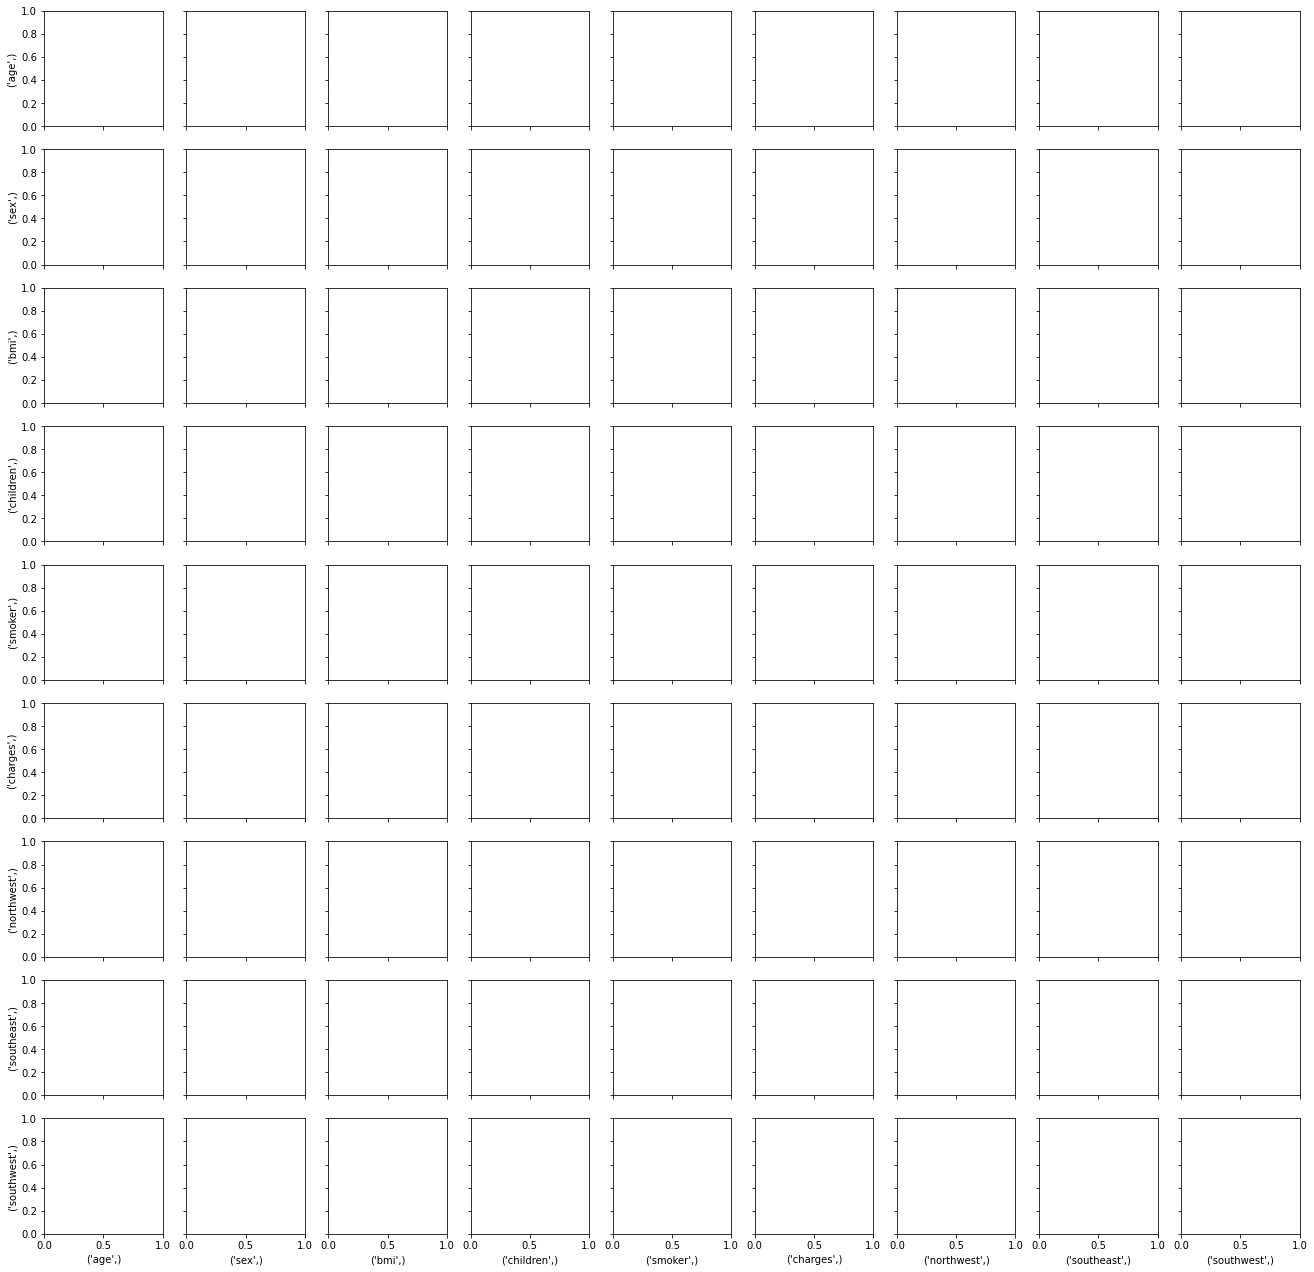

In [136]:
sns.pairplot(df, kind='reg',hue='sex', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})